In [23]:

import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fname = "workcomp_extract.csv"
dpath = "../../../Data/"

In [8]:
fpath = os.path.join(dpath, fname)

In [14]:
cols = ['Tons_Collected', 'Dump_Time_Stamp', 'Section_Code','Truck_ID', 'Material_Type_Code', 'Route_Code']
data_types = {'Truck_ID': str,
              'Section_Code': str,
              'Tons_Collected': float,
              'Dump_Time_Stamp': str,
              'Material_Type_Code': int,
              'Route_Code': str 
             }

In [15]:
df = pd.read_csv(fpath, usecols=cols, dtype=data_types)

In [19]:
df.index = pd.to_datetime(df['Dump_Time_Stamp'])

In [33]:
refuse = df[df['Material_Type_Code'] == 1]

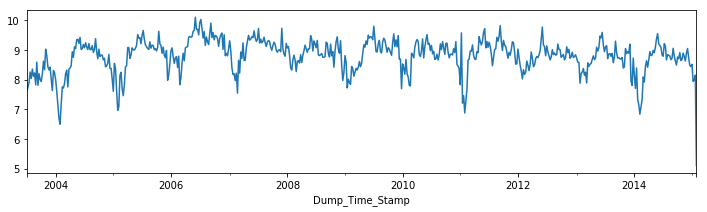

In [37]:
refuse.resample('W')['Tons_Collected'].mean().plot(figsize=(12,3))
plt.show()

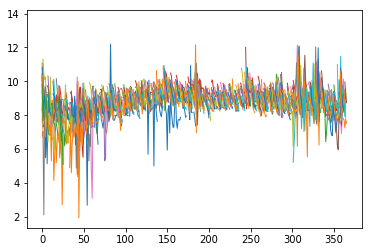

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

for ind, val in refuse.groupby([refuse.index.year]):
    ax.plot(val['Tons_Collected'].resample('D').mean().values, lw=1)

plt.show()

(2015.0, 5.0)


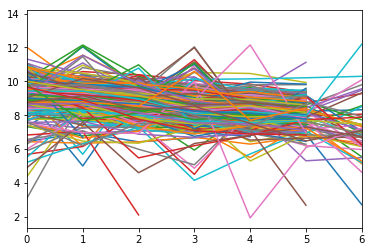

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

for ind, val in refuse.groupby([refuse.index.year, refuse.index.weekofyear]):
    ax.plot(val['Tons_Collected'].resample('D').mean().values)
    ax.set_xlim(0,6)

plt.show()